## Data manipulation

Code to compute, export and plot both energy and operational carbon footprint datasets

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [2]:
# PWR DATASET
dataset_P = pd.read_csv('../PowerDataset_3_years.csv', index_col=0, parse_dates=True)

dataset_P.index = pd.to_datetime(dataset_P.index).tz_localize(None) # To remove the localization in the datetime format

dataset_P

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,530.882353,20.000000,529.444444,550.606061,577.948718,528.611111,568.571429,669.487179,574.857143,547.297297,...,512.000000,525.294118,530.294118,527.837838,521.142857,530.285714,526.756757,561.315789,539.705882,526.000000
2020-05-02 18:00:00,532.025641,20.000000,529.042791,548.348292,575.650935,527.948171,571.401899,667.741604,573.162629,546.831131,...,511.356838,527.112341,530.396878,527.295592,520.331584,530.313347,527.160159,562.404254,539.750465,524.765520
2020-05-02 19:00:00,541.962608,20.000000,532.534305,554.683586,581.220896,527.629587,571.127541,670.140471,573.512427,547.244151,...,511.393428,525.655454,530.244126,528.170642,520.270270,530.186054,525.208819,560.954731,537.384654,525.631471
2020-05-02 20:00:00,544.268327,20.000000,532.654562,557.141766,586.214043,529.118962,571.603887,674.412953,576.784291,547.738046,...,511.756579,527.205914,530.569659,527.977996,520.715861,530.500481,524.167448,560.610850,537.646236,525.149199
2020-05-02 21:00:00,542.883504,20.000000,533.145359,556.479451,587.117900,528.839406,572.772164,675.122225,576.477301,548.337485,...,512.915703,529.027778,530.596706,529.074976,522.041521,530.186054,527.420255,563.308303,539.427887,525.096847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,532.969697,541.555556,526.484848,550.388889,576.042929,520.782828,571.000000,549.944444,566.535354,535.333333,...,1204.111111,841.996212,1155.944444,1583.000000,869.055556,1193.555556,779.055556,745.944444,1196.444444,1255.888889
2022-09-28 19:00:00,533.333333,541.111111,527.333333,550.611111,577.055556,520.333333,567.500000,549.333333,567.055556,536.277778,...,1205.000000,703.944444,1173.000000,1593.166667,868.833333,1196.000000,670.000000,635.777778,1201.000000,1251.611111
2022-09-28 20:00:00,532.555556,541.277778,526.555556,548.944444,575.722222,520.888889,570.000000,550.444444,566.166667,535.611111,...,1203.944444,863.444444,1175.166667,1587.444444,708.833333,1195.555556,610.888889,902.000000,1195.222222,1245.722222


In [3]:
# CI DATASET
dataset_CI = pd.read_csv('../CI_Dataset.csv', index_col=0, parse_dates=True)

dataset_CI

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,LCA+direct
timestamp,,,,,
2021-01-01 00:00:00,303.29,389.74,35.12,30.82,693.03
2021-01-01 01:00:00,303.45,387.76,36.15,33.12,691.21
2021-01-01 02:00:00,295.04,377.86,37.89,33.65,672.90
2021-01-01 03:00:00,295.56,380.36,37.14,32.05,675.92
2021-01-01 04:00:00,308.06,394.66,34.50,31.71,702.72
...,...,...,...,...,...
2023-12-31 19:00:00,260.51,333.72,46.38,36.24,594.23
2023-12-31 20:00:00,265.88,342.93,43.68,32.08,608.81
2023-12-31 21:00:00,250.60,324.02,47.82,32.64,574.62


In [4]:
# Energy computation
dataset_E = dataset_P * 3.6 # this way we get energy values in kWh

dataset_E

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,1911.176471,72.0,1906.000000,1982.181818,2080.615385,1903.000000,2046.857143,2410.153846,2069.485714,1970.270270,...,1843.200000,1891.058824,1909.058824,1900.216216,1876.114286,1909.028571,1896.324324,2020.736842,1942.941176,1893.600000
2020-05-02 18:00:00,1915.292308,72.0,1904.554047,1974.053851,2072.343365,1900.613415,2057.046835,2403.869774,2063.385465,1968.592070,...,1840.884615,1897.604427,1909.428762,1898.264131,1873.193702,1909.128049,1897.776571,2024.655314,1943.101673,1889.155870
2020-05-02 19:00:00,1951.065387,72.0,1917.123496,1996.860910,2092.395227,1899.466513,2056.059147,2412.505696,2064.644737,1970.078945,...,1841.016342,1892.359633,1908.878853,1901.414312,1872.972973,1908.669794,1890.751748,2019.437030,1934.584756,1892.273297
2020-05-02 20:00:00,1959.365977,72.0,1917.556424,2005.710359,2110.370555,1904.828264,2057.773994,2427.886632,2076.423448,1971.856965,...,1842.323684,1897.941290,1910.050772,1900.720787,1874.577098,1909.801733,1887.002814,2018.199060,1935.526448,1890.537118
2020-05-02 21:00:00,1954.380616,72.0,1919.323293,2003.326023,2113.624440,1903.821862,2061.979789,2430.440009,2075.318282,1974.014945,...,1846.496530,1904.500000,1910.148141,1904.669915,1879.349476,1908.669794,1898.712919,2027.909890,1941.940393,1890.348649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,1918.690909,1949.6,1895.345455,1981.400000,2073.754545,1874.818182,2055.600000,1979.800000,2039.527273,1927.200000,...,4334.800000,3031.186364,4161.400000,5698.800000,3128.600000,4296.800000,2804.600000,2685.400000,4307.200000,4521.200000
2022-09-28 19:00:00,1920.000000,1948.0,1898.400000,1982.200000,2077.400000,1873.200000,2043.000000,1977.600000,2041.400000,1930.600000,...,4338.000000,2534.200000,4222.800000,5735.400000,3127.800000,4305.600000,2412.000000,2288.800000,4323.600000,4505.800000
2022-09-28 20:00:00,1917.200000,1948.6,1895.600000,1976.200000,2072.600000,1875.200000,2052.000000,1981.600000,2038.200000,1928.200000,...,4334.200000,3108.400000,4230.600000,5714.800000,2551.800000,4304.000000,2199.200000,3247.200000,4302.800000,4484.600000


In [5]:
# Operational Carbon Footprint computation
# We need to get the same period of time from the energy and the carbon intensity datasets
start = pd.to_datetime('2021-01-01 00:00:00') 
end = pd.to_datetime('2022-09-28 22:00:00')

partial_dataset_E = dataset_E.loc[start:end]
partial_dataset_CI = dataset_CI.loc[start:end]

dataset_Cop = partial_dataset_E.mul(partial_dataset_CI['Carbon Intensity gCO₂eq/kWh (direct)'], axis=0) # gCO2
dataset_Cop = dataset_Cop / 1000 # kgCO2

dataset_Cop 

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,523.296566,608.157108,579.890480,607.125922,642.610852,570.003226,627.143062,609.430926,633.087546,601.120780,...,827.678410,653.407976,699.386740,723.104018,646.492964,649.343890,833.865526,1004.926600,888.761016,670.756164
2021-01-01 01:00:00,523.269180,608.417250,580.075020,603.562050,640.340190,570.000480,625.895970,608.720700,633.664290,598.524780,...,832.545420,654.238200,698.299140,724.153080,647.501610,648.047820,1261.016820,1007.514690,886.316760,668.439660
2021-01-01 02:00:00,508.471936,590.139008,563.231360,587.601664,623.124480,552.786944,609.493632,592.381312,616.102528,581.641856,...,813.602304,635.280128,674.638464,703.139328,628.140160,627.963136,1208.424832,975.933312,860.277632,649.383040
2021-01-01 03:00:00,510.018336,593.366256,564.224040,589.937760,622.567584,555.652800,611.927424,594.252936,617.365728,586.391040,...,812.317104,636.636240,679.965336,703.137240,626.350752,629.897472,1222.968168,973.751976,867.409488,650.645784
2021-01-01 04:00:00,531.218664,617.845136,588.825884,614.764536,649.452092,580.323428,636.513572,619.693496,643.845400,611.006204,...,1003.905928,662.390612,700.466828,735.893728,656.291024,658.817116,1280.482196,1011.360980,674.281728,677.916836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,689.404831,700.510776,681.016575,711.936834,745.120746,673.640921,738.597636,711.361938,732.822544,692.462232,...,1557.536988,1089.135572,1495.232634,2047.635828,1124.137266,1543.883208,1007.720826,964.891074,1547.620032,1624.512372
2022-09-28 19:00:00,720.460800,730.967520,712.355616,743.800728,779.523576,702.899568,766.615320,742.074624,766.014936,724.438344,...,1627.791120,950.933208,1584.563472,2152.151496,1173.675672,1615.633344,905.078880,858.849312,1622.387664,1690.756392
2022-09-28 20:00:00,732.217024,744.209312,723.967552,754.750304,791.567392,716.176384,783.699840,756.812672,778.429344,736.418144,...,1655.317664,1187.160128,1615.750752,2182.596416,974.583456,1643.783680,839.918464,1240.170624,1643.325376,1712.758432


In [6]:
# Dataset exporting as a CSV file for later use
output_file = '../E_Dataset.csv'
dataset_E.to_csv(output_file, index_label='timestamp')

output_file = '../Cop_Dataset.csv'
dataset_Cop.to_csv(output_file, index_label='timestamp')

## Plotting

In [7]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size, ylabel, title, label):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend()
    plt.show

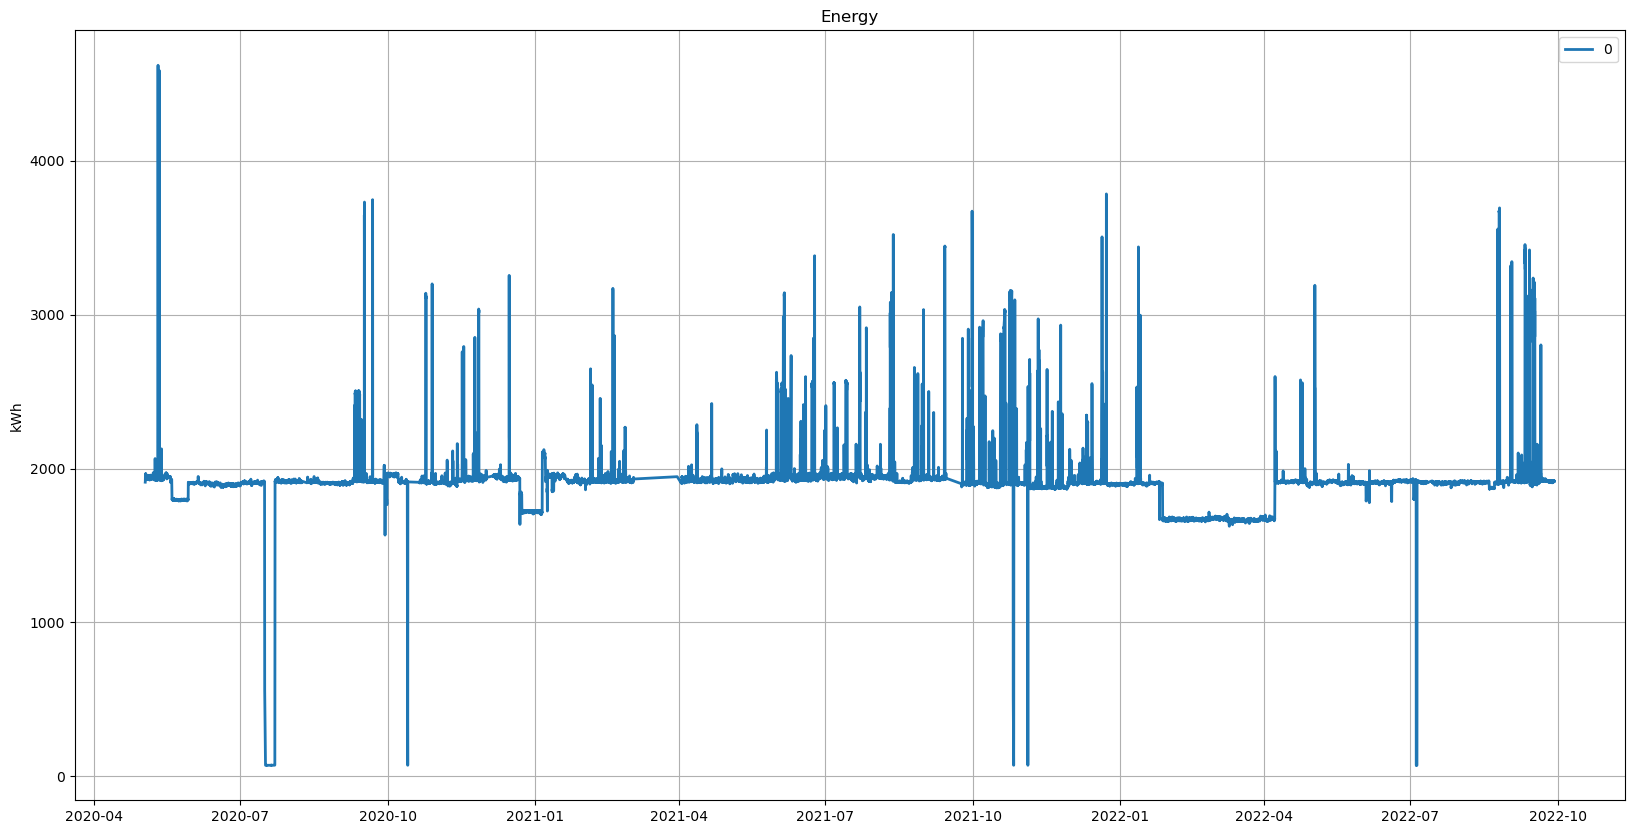

In [8]:
# Energy plotting
showplot(dataset_E['0'], (20,10), 'kWh', 'Energy', dataset_E.columns[0]) # Specific node
#showplot(dataset_E.iloc[:, 0:5], (20,10), 'kWh', 'Energy', dataset_E.columns[0:5]) # Set of nodes

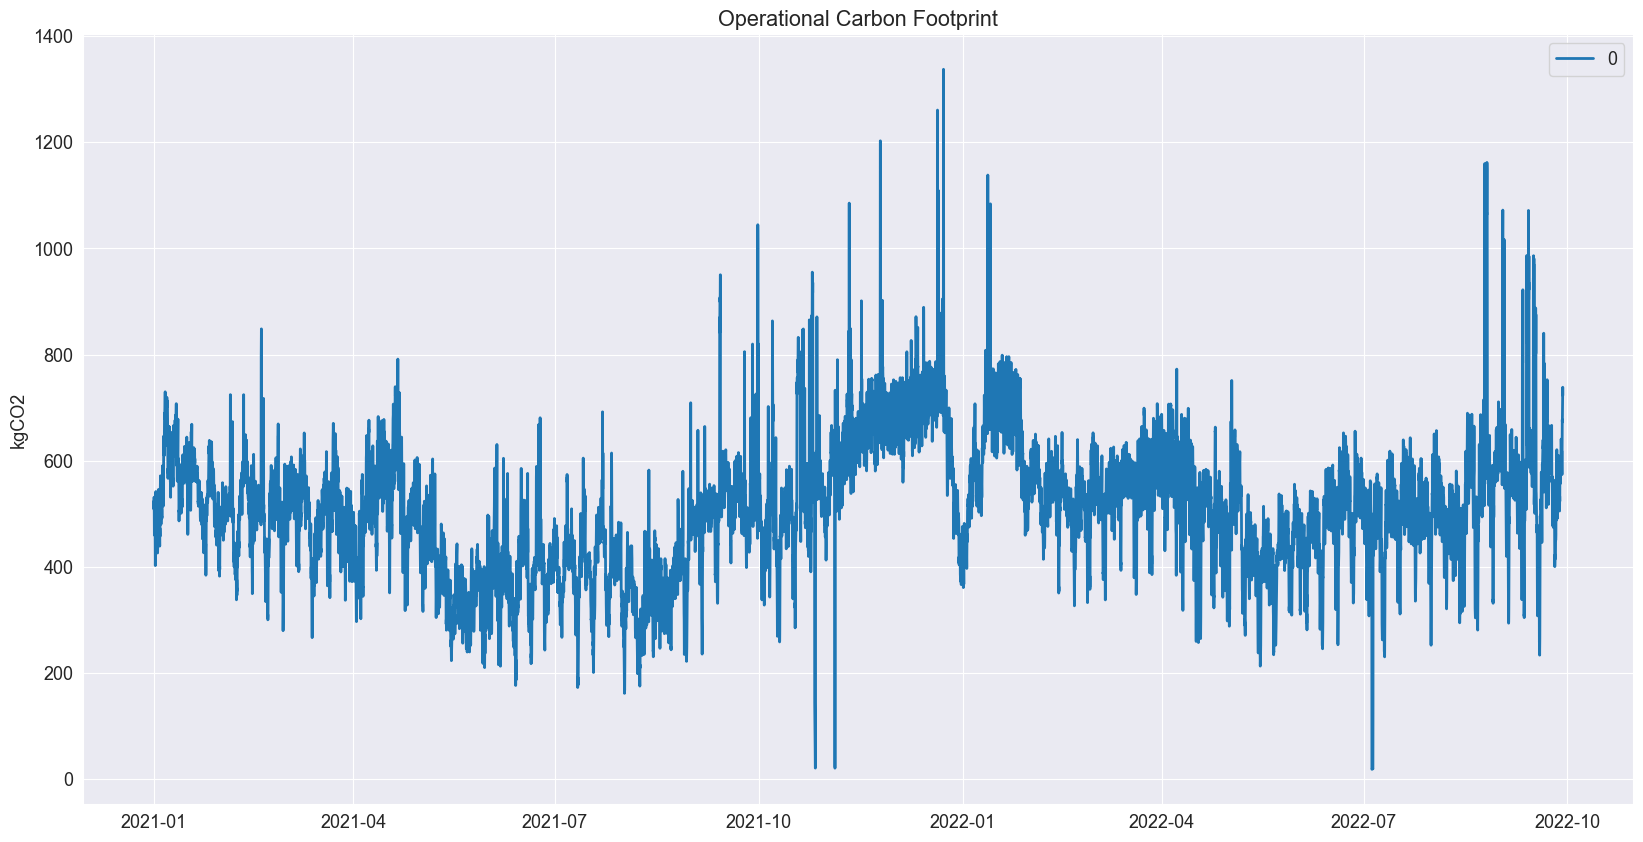

In [10]:
# Cop plotting
showplot(dataset_Cop['0'], (20,10), 'kgCO2', 'Operational Carbon Footprint', dataset_Cop.columns[0]) # Specific node
#showplot(dataset_Cop.iloc[:, 0:5], (20,10), 'kgCO2', 'Operational Carbon Footprint', dataset_Cop.columns[0:5]) # Set of nodes

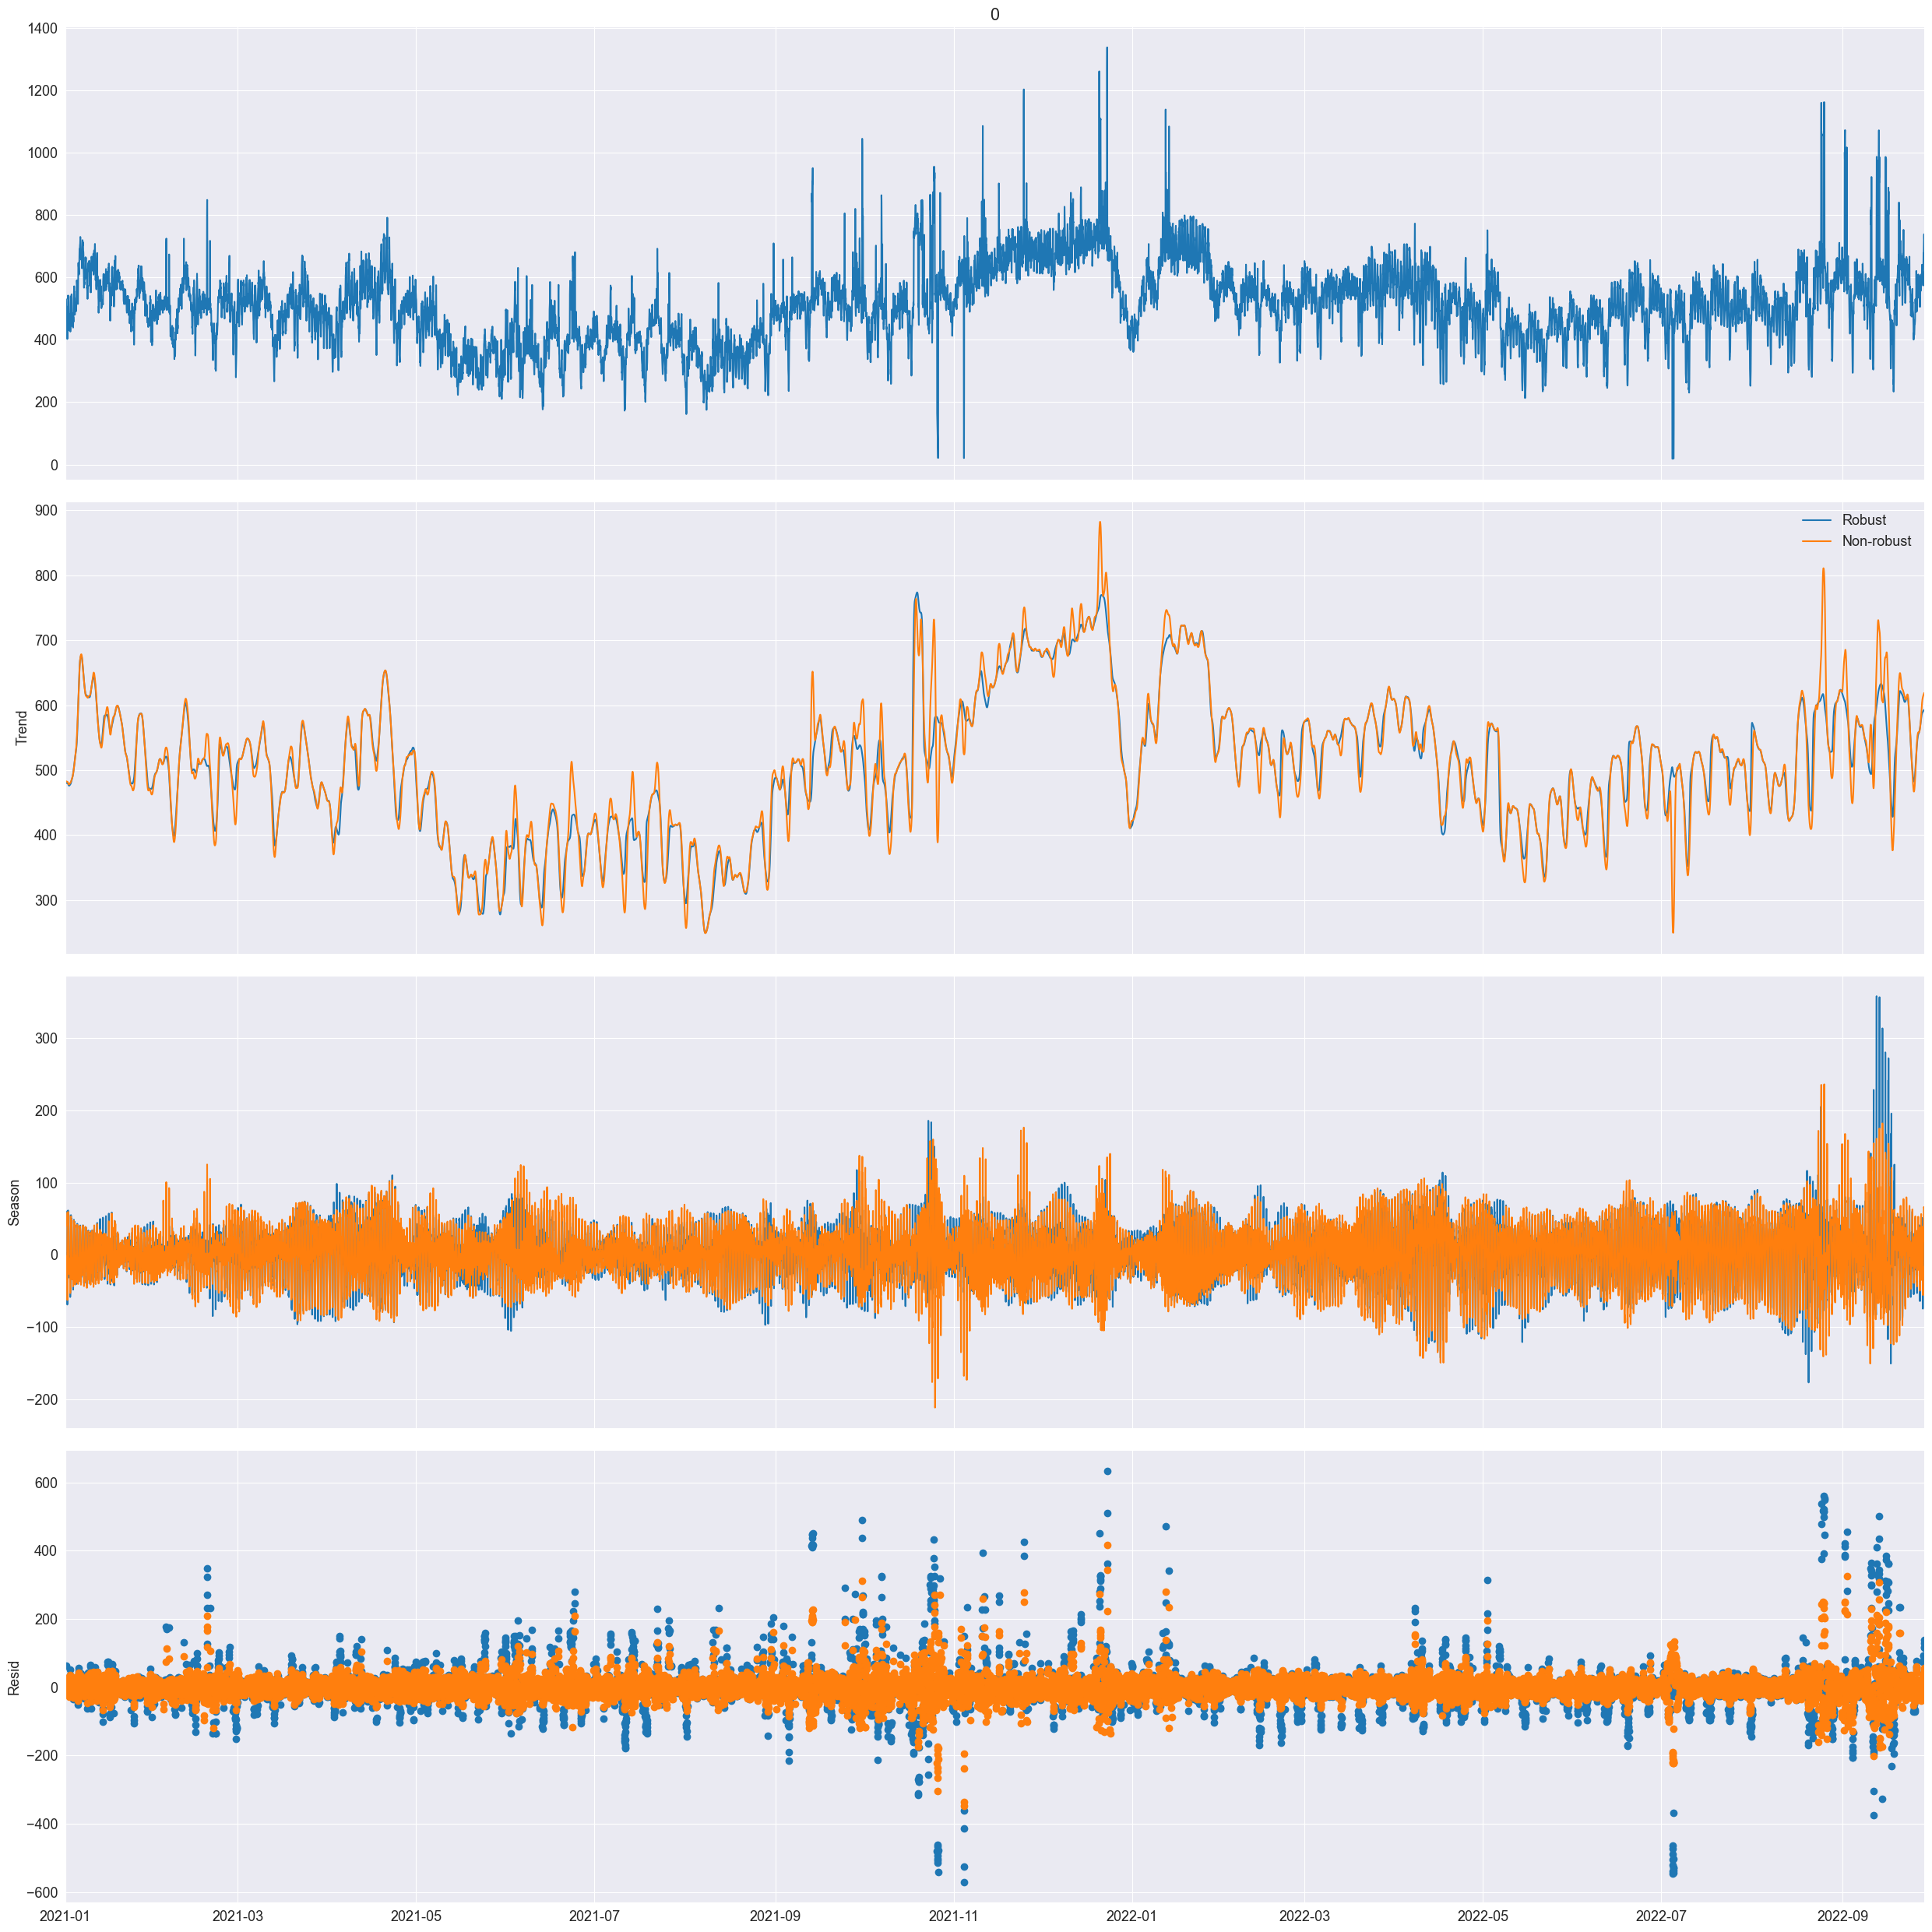

In [9]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_Cop['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_Cop['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

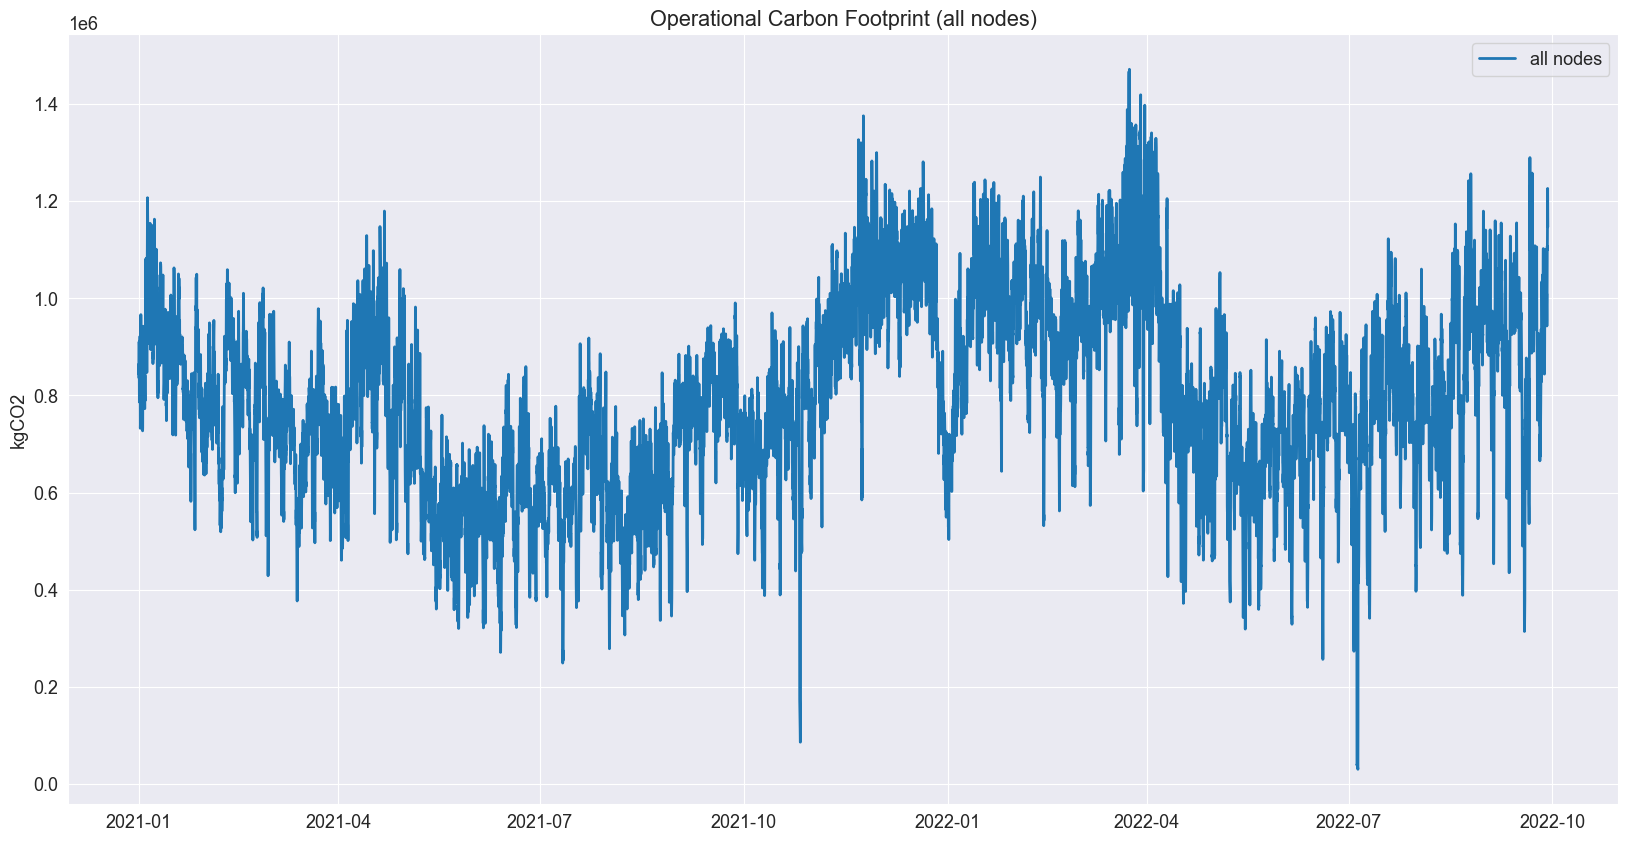

In [11]:
# In the end we want to plot the Cop of all nodes summed together
showplot(dataset_Cop.sum(axis=1), (20,10), 'kgCO2', 'Operational Carbon Footprint (all nodes)', 'all nodes')